# Spotify Data

I have great passion towards the Music industry. I produce and remix music in my free time to have some passive monthly income. I want to create better music by studying the Spotify dataset and understanding music recommendation. My current process is to find popular TikTok songs and remix them. However, my music barely hit a good algorithm resulting in low streams. My goal is to do a deep dive analysis of music to see what type of music I should remix and ultimately make more profit efficiently.  

Spotify API documentation : https://spotipy.readthedocs.io/en/2.18.0/  
Dataset : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px 
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

In [2]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = 'naahhhhhhh'
os.environ['KAGGLE_KEY'] = "9a731ff79105d5fa40f80e9a9daceed2"


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [6]:
api.dataset_download_files("yamaerenay/spotify-dataset-19212020-160k-tracks")

In [7]:
songdf = pd.read_csv('spotify-dataset-19212020-160k-tracks/data_o.csv')
genredf = pd.read_csv('spotify-dataset-19212020-160k-tracks/data_by_genres_o.csv')
yeardf = pd.read_csv('spotify-dataset-19212020-160k-tracks/data_by_year_o.csv')

In [8]:
songdf.info()
songdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [9]:
songdf.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [10]:
genredf.info()
genredf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [11]:
yeardf.info()
yeardf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

## Music Over The Years

In [13]:
yeardf.describe()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


In [14]:
yearfeature = ['acousticness','danceability','energy','instrumentalness','liveness','valence']

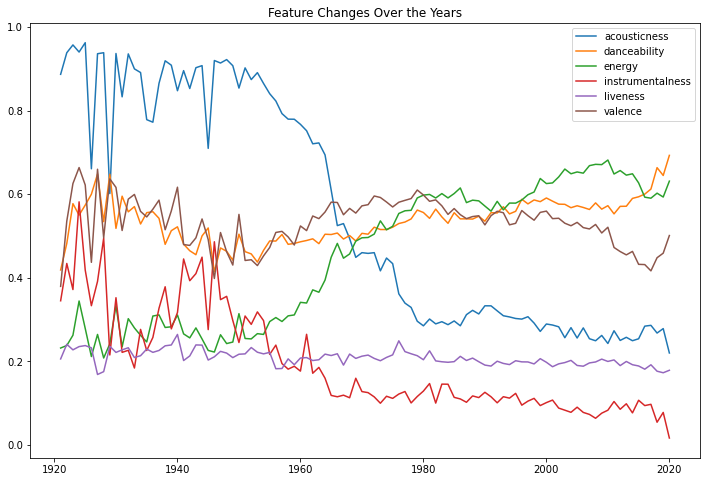

In [15]:
plt.figure(figsize = (12,8))
for i in yearfeature:
    plt.plot(yeardf['year'] , yeardf[i], label = i)
plt.title('Feature Changes Over the Years')
plt.legend()

UPWARD TREND FEATURES: danceability, energy  
DOWNWARD TREND FEATURES: instrumentalness, acousticness

**Keeping these trends in mind when looking at what music to remix**

## ElasticNet to predict Popularity

I will be running basic ElasticNet Regression to predict popularity. I like ElasticNet over lasso and ridge because it combines the strength of the two models and eliminates the weakness entailed in each model. Some examples are feature elimination and coefficient reduction (strength). I am using GridSearchCV to showcase simple hyperparameter tuning and finding the best parameters. Then I want to compare results to ElasticNetCV to see if there are any significance difference.

### GridSearchCV

In [16]:
mldf = songdf.select_dtypes(include=['int64','float'])

In [17]:
num_feature = tuple(mldf.columns)

In [18]:
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

In [19]:
pipeline = Pipeline(steps)
parameters = {'elasticnet__l1_ratio' : np.linspace(0,1,50)
              ,'elasticnet__alpha' : np.arange(0.0001,0.001,0.0001)
              }

In [20]:
X = mldf[mldf.columns.difference(['popularity'])]
y = mldf['popularity']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
gm_cv = GridSearchCV(pipeline, parameters)
gm_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'elasticnet__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])})

In [23]:
r2 = gm_cv.score(X_test, y_test)

In [24]:
gm_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0009000000000000001, l1_ratio=1.0))])

In [25]:
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__alpha': 0.0009000000000000001, 'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7611587851369274


ElasticNet is performing the best when l1 ratio = 1.0. This means the penalty of the model is only a L1 penalty, which is basically Lasso Regression. Lasso regression minimizes useless feature coefficients to 0. In comparison to ridge regression, Lasso is considered a more simple model and fits in less noise in the model.

### ElasticNetCV

In [26]:
mldf = DataFrame(StandardScaler().fit_transform(mldf))

In [27]:
mldf.columns = num_feature
X = mldf[mldf.columns.difference(['popularity'])]
y = mldf['popularity']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
cv_model = ElasticNetCV(l1_ratio = np.linspace(0.01,1,50), eps=0.001, n_alphas=100)

In [30]:
cv_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]))

In [31]:
cv_model.alpha_

0.0008608594003032543

In [32]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)

Optimal alpha: 0.00086086
Optimal l1_ratio: 1.000


In [33]:
model = ElasticNet(l1_ratio = 1.0, alpha = cv_model.alpha_)
model.fit(X_train, y_train)

ElasticNet(alpha=0.0008608594003032543, l1_ratio=1.0)

In [34]:
r2_score(y_test, model.predict(X_test))

0.7611399464434808

##### **In comparison, both method yield similar R-squared results and hyperparameters

### Feature Importance and Coefficients

In [35]:
model.coef_

array([-0.06805048,  0.02137351, -0.0009368 , -0.01152508,  0.01037842,
       -0.06145049,  0.        , -0.02410462,  0.        , -0.00272879,
       -0.05650825,  0.00195758,  0.00612935,  0.79078951])

In [36]:
feature_importance = pd.Series(index = X_train.columns, data=np.abs(model.coef_))

In [37]:
feature_importance = feature_importance.sort_values(ascending=False)

In [38]:
feature_importance

year                0.790790
acousticness        0.068050
instrumentalness    0.061450
speechiness         0.056508
liveness            0.024105
danceability        0.021374
energy              0.011525
explicit            0.010378
valence             0.006129
mode                0.002729
tempo               0.001958
duration_ms         0.000937
loudness            0.000000
key                 0.000000
dtype: float64

I believe the importance of the feature 'year' is extremely high relative to popularity because songs fall out of trend easily.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

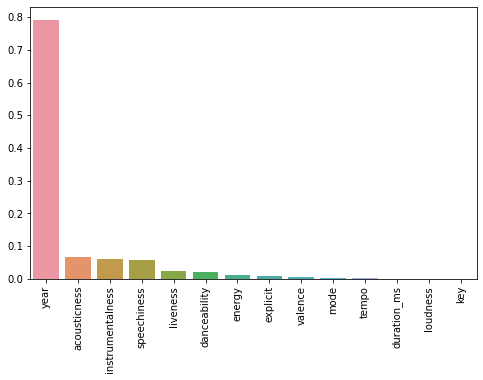

In [39]:
plt.figure(figsize = (8,5))
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.xticks(rotation=90)

## Clustering with K-Means

### Genre Data Clustering  
 
Showcase simple K-means clustering to divide genre dataset into optimal cluster based on numerical song features of each genre.

In [40]:
# getting numerical features from genre dataframe and standardscaler transformation
genre_cluster = genredf.select_dtypes(np.number)
genre_cluster = DataFrame(StandardScaler().fit_transform(genre_cluster))
genre_cluster.columns = tuple(genredf.select_dtypes(np.number).columns)

In [41]:
# sum of squared distances
SSD = []
for k in range(1,18):
    km = KMeans(n_clusters=k)
    km = km.fit(genre_cluster)
    SSD.append(km.inertia_)

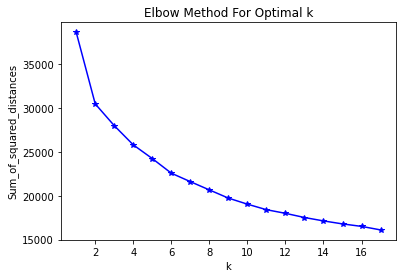

In [42]:
plt.plot(range(1,18), SSD, 'b*-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Optimal K cluster through elbow method : 10

In [43]:
steps = [('scaler', StandardScaler()),
         ('kmeans', KMeans(n_clusters=10))]


In [44]:
cluster_pipeline = Pipeline(steps)
X = genredf.select_dtypes(np.number)
cluster_pipeline.fit(X)
genredf['cluster'] = cluster_pipeline.predict(X)

#### Visualize Cluster with PCA

In [45]:
pca_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('PCA', PCA(n_components=2))])

In [46]:
genre_embed = pca_pipeline.fit_transform(X)
results = pd.DataFrame(columns=['x','y'], data= genre_embed)
results['genres'] = genredf['genres']
results['cluster'] = genredf['cluster']

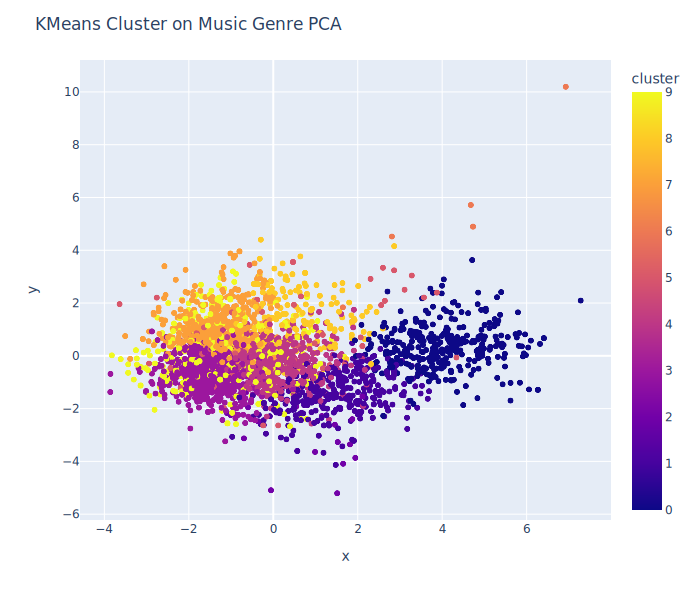

In [47]:
fig = px.scatter(results, x = 'x', y= 'y', color = 'cluster', hover_data=['genres'], width = 700, height = 600)
fig.update_layout(title='KMeans Cluster on Music Genre PCA')
fig.show(renderer="svg")

#### Visualize Cluster with TSNE

In [48]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('tsne', TSNE(n_components=2))])

In [49]:
X = genredf.select_dtypes(np.number)

In [50]:
genre_embed = tsne_pipeline.fit_transform(X)
results = pd.DataFrame(columns=['x','y'], data= genre_embed)
results['genres'] = genredf['genres']
results['cluster'] = genredf['cluster']


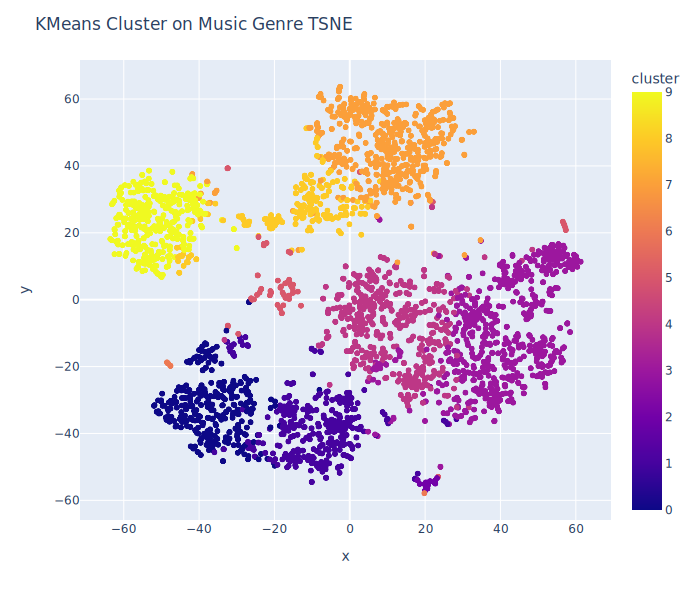

In [51]:
fig = px.scatter(results, x = 'x', y= 'y', color = 'cluster', hover_data=['genres'], width = 700, height = 600)
fig.update_layout(title='KMeans Cluster on Music Genre TSNE')
fig.show(renderer="svg")

## Recommender System

Usage of spotipy api to retrieve and manipulated data from spotify database. Main goal is to recommend a list of songs from another list of songs by using cosine distance between vectors

1. standardize data
2. retrieve songs features(vectors) of playlist
3. use cosine distance to find top related songs of playlist



In [52]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

os.environ["SPOTIFY_CLIENT_ID"] = '4581415201074184a3d34162255b55be'
os.environ["SPOTIFY_CLIENT_SECRET"] = 'cd91af738e01405c80af08fdac014ab2'
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))

In [53]:
#get song data on Positions by Ariana Grande, Year 2020
results = sp.search(q= 'track: {} year: {}'.format('Positions', 2020), limit=1)
results = results['tracks']['items'][0]
sp.audio_features(results['id'])[0]

{'danceability': 0.737,
 'energy': 0.802,
 'key': 0,
 'loudness': -4.771,
 'mode': 1,
 'speechiness': 0.0878,
 'acousticness': 0.468,
 'instrumentalness': 0,
 'liveness': 0.0931,
 'valence': 0.682,
 'tempo': 144.015,
 'type': 'audio_features',
 'id': '35mvY5S1H3J2QZyna3TFe0',
 'uri': 'spotify:track:35mvY5S1H3J2QZyna3TFe0',
 'track_href': 'https://api.spotify.com/v1/tracks/35mvY5S1H3J2QZyna3TFe0',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/35mvY5S1H3J2QZyna3TFe0',
 'duration_ms': 172325,
 'time_signature': 4}

In [54]:
#function to get song data dataframe
def songdf_get(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None
    
    
    results = results['tracks']['items'][0]
    features = sp.audio_features(results['id'])[0]
    song_data['name'] = name
    song_data['year'] = year
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]
    
    
    
    
    for key, value in features.items():
        song_data[key] = value
    return pd.DataFrame(song_data)

In [55]:
a = songdf_get('bad habits', 2021)

In [56]:
a.dtypes

name                 object
year                  int64
explicit              int64
duration_ms           int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
time_signature        int64
dtype: object

In [57]:
a

,name,year,explicit,duration_ms,popularity,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,bad habits,2021,0,231041,97,0.808,0.897,11,-3.712,0,...,0.000031,0.364,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4


In [58]:
playlist = [{'name': 'Boyfriend', 'year':2019},
                {'name': 'Need to Know', 'year': 2021},
                {'name': 'You Right', 'year': 2021},
                {'name': 'Good Form', 'year': 2018},
                {'name': 'Rules', 'year': 2019}]

In [59]:
playlist2 = [{'name':'Hayloft', 'year':2008}]

In [60]:
#list of features in vector for each song
numfeatures = songdf.select_dtypes(include=['int64','float']).columns

In [61]:
numfeatures

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [62]:

def mean_vectors(songlist):
    
    vector = []
    for song in songlist:
        songdata = songdf_get(song['name'], song['year'])
        temp = songdata[numfeatures].values
        vector.append(temp)
    songmatrix = np.array(list(vector))
    return np.mean(songmatrix, axis=0)

In [63]:
# weighted average of features, weight is determined by popularity score
def weighted_mean_vectors(songlist):
    vector = []
    weight = []


    for song in songlist:
        songdata = songdf_get(song['name'], song['year'])
        weight.append(songdata['popularity'][0])
        temp = songdata[numfeatures].values
        vector.append(temp)
    songmatrix = np.array(list(vector))

    sumweight = sum(weight)

    for x in range(0,len(weight)):
        weight[x] = weight[x] / sumweight

    for x in range(0,len(songmatrix)):
        songmatrix[x] = songmatrix[x] * weight[x]

    return sum(songmatrix)
    

In [64]:
mean_vectors(playlist)

array([[ 4.648000e-01,  2.019600e+03,  1.327400e-01,  6.908000e-01,
         2.014746e+05,  6.964000e-01,  1.000000e+00,  4.890000e-04,
         6.600000e+00,  1.136200e-01, -5.372200e+00,  8.000000e-01,
         7.880000e+01,  1.764400e-01,  1.379372e+02]])

In [65]:
weighted_mean_vectors(playlist)

array([[ 4.64035533e-01,  2.01970812e+03,  1.33525635e-01,
         6.89659898e-01,  2.00193909e+05,  6.91652284e-01,
         1.00000000e+00,  5.51789340e-04,  6.55076142e+00,
         1.12634010e-01, -5.43967766e+00,  8.04568528e-01,
         7.95329949e+01,  1.70832741e-01,  1.38573061e+02]])

In [66]:
def flatten_songdict(dict_list):
    
    flattened = defaultdict()
    
    for key in dict_list[0].keys():
        flattened[key] = []
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened[key].append(value)
            
    return flattened

In [67]:
flatten_songdict(playlist)

defaultdict(None,
            {'name': ['Boyfriend',
              'Need to Know',
              'You Right',
              'Good Form',
              'Rules'],
             'year': [2019, 2021, 2021, 2018, 2019]})

In [79]:
def song_rec(songlist, numsongs = 8):
    
    mean = mean_vectors(songlist)
    
    #Standard Scaler 
    scaler = StandardScaler().fit(songdf[numfeatures])
    scaled_df = scaler.transform(songdf[numfeatures])
    scaled_mean = scaler.transform(mean.reshape(1,-1))
    
    #compute lowest distance between playlist average and dataset
    distance = cdist(scaled_mean, scaled_df, 'cosine')
    index = list(np.argsort(distance)[:, :][0])
    
    #to make sure recommended songs are not already in playlist
    songdict = flatten_songdict(songlist)
    
    rec = songdf.iloc[index]
    rec = rec[~rec['name'].isin(songdict['name'])]
    
    return rec.head(numsongs)

In [69]:
#song recommendation using weighted average vectors
def song_rec2(songlist, numsongs = 8):
    
    mean = weighted_mean_vectors(songlist)
    
    #Standard Scaler 
    scaler = StandardScaler().fit(songdf[numfeatures])
    scaled_df = scaler.transform(songdf[numfeatures])
    scaled_mean = scaler.transform(mean.reshape(1,-1))
    
    #compute lowest distance between playlist average and dataset
    distance = cdist(scaled_mean, scaled_df, 'cosine')
    index = list(np.argsort(distance)[:, :][0])
    
    #to make sure recommended songs are not already in playlist
    songdict = flatten_songdict(songlist)
    
    rec = songdf.iloc[index]
    rec = rec[~rec['name'].isin(songdict['name'])]
    
    return rec.head(numsongs)

#### Using Recommendation Function

In [70]:
playlist

[{'name': 'Boyfriend', 'year': 2019},
 {'name': 'Need to Know', 'year': 2021},
 {'name': 'You Right', 'year': 2021},
 {'name': 'Good Form', 'year': 2018},
 {'name': 'Rules', 'year': 2019}]

In [80]:
song_rec(playlist,10)[['name','year']]

,name,year
19654,just like magic,2020
19309,Roses (with Juice WRLD feat. Brendon Urie),2018
19583,Flaws And Sins,2019
38105,Roses (with Juice WRLD feat. Brendon Urie),2018
19359,Missin You Crazy,2018
19070,Lust,2017
19240,Black & White,2018
75176,Snitches & Rats (feat. Young Nudy),2020
38502,Heartless (feat. Mustard),2020
19460,OUT WEST (feat. Young Thug),2019


In [76]:
song_rec2(playlist,10)[['name','year']]

,name,year
19654,just like magic,2020
19309,Roses (with Juice WRLD feat. Brendon Urie),2018
19583,Flaws And Sins,2019
38105,Roses (with Juice WRLD feat. Brendon Urie),2018
19359,Missin You Crazy,2018
19070,Lust,2017
19240,Black & White,2018
38502,Heartless (feat. Mustard),2020
19705,Blastoff (feat. Juice Wrld & Trippie Redd),2020
75176,Snitches & Rats (feat. Young Nudy),2020
